In [10]:
import polars as pl
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
tactics_root = Path.cwd().parent / 'src'
sys.path.insert(0, str(tactics_root))
from TACTICS.library_enumeration.smarts_toolkit import *

In [4]:
prod_scores = pl.read_csv("/Users/aakankschitnandkeolyar/Desktop/TACTICS/data/scores/thrombin/product_scores.csv")

📊 Analyzing Errors Between FEP and Experimental Edge Values

Number of edges: 499720
Error range: [-17.8288, 10.0284] kcal/mol

Fitted Normal Distribution Parameters:
  Mean (μ): -10.7070 
  Std (σ): 1.6377 
  Variance (σ²): 2.6821 


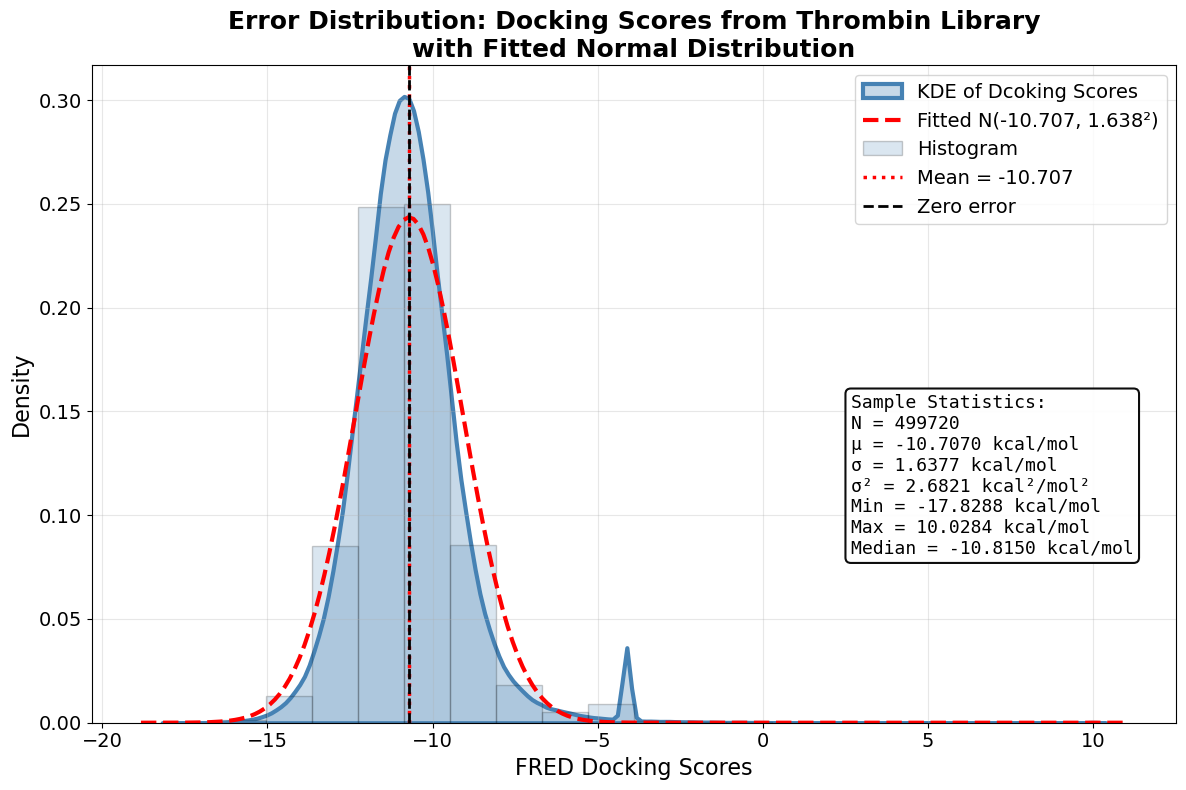


✅ Error distribution analysis complete!
✅ KDE plot saved as 'fep_error_distribution_kde.pdf'

📊 Summary Statistics
Mean error: -10.7070 kcal/mol
Std error: 1.6377 kcal/mol
Median error: -10.8150 kcal/mol
MAE: 10.7091 kcal/mol


TypeError: Series.mean() got an unexpected keyword argument 'axis'

In [26]:
print("📊 Analyzing Errors Between FEP and Experimental Edge Values")
print("=" * 50)

# Docking Scores
scores = prod_scores["Scores"]

print(f"\nNumber of edges: {len(scores)}")
print(f"Error range: [{scores.min():.4f}, {scores.max():.4f}] kcal/mol")

# Fit Normal distribution to the errors
mu, sigma = stats.norm.fit(scores)

print(f"\nFitted Normal Distribution Parameters:")
print(f"  Mean (μ): {mu:.4f} ")
print(f"  Std (σ): {sigma:.4f} ")
print(f"  Variance (σ²): {sigma**2:.4f} ")

# Create KDE plot with fitted Normal distribution
fig, ax = plt.subplots(figsize=(12, 8))

# KDE plot
sns.kdeplot(scores, ax=ax, color='steelblue', fill=True, alpha=0.3, linewidth=3, label='KDE of Dcoking Scores')

# Overlay fitted normal distribution
x = np.linspace(scores.min() - 1, scores.max() + 1, 200)
fitted_normal = stats.norm.pdf(x, mu, sigma)
ax.plot(x, fitted_normal, 'r--', linewidth=3, label=f'Fitted N({mu:.3f}, {sigma:.3f}²)')

# Add histogram for reference
ax.hist(scores, bins=20, density=True, alpha=0.2, color='steelblue', edgecolor='black', label='Histogram')

# Add vertical lines
ax.axvline(mu, color='red', linestyle=':', linewidth=2.5, label=f'Mean = {mu:.3f}')
ax.axvline(mu, color='black', linestyle='--', linewidth=2, label='Zero error')

ax.set_xlabel('FRED Docking Scores', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.set_title('Error Distribution: Docking Scores from Thrombin Library\nwith Fitted Normal Distribution', 
             fontsize=18, fontweight='bold')
ax.legend(fontsize=14, loc='upper right')
ax.grid(True, alpha=0.3)
ax.tick_params(axis='both', labelsize=14)

# Add statistics box
stats_text = f"Sample Statistics:\n"
stats_text += f"N = {len(scores)}\n"
stats_text += f"μ = {mu:.4f} kcal/mol\n"
stats_text += f"σ = {sigma:.4f} kcal/mol\n"
stats_text += f"σ² = {sigma**2:.4f} kcal²/mol²\n"
stats_text += f"Min = {scores.min():.4f} kcal/mol\n"
stats_text += f"Max = {scores.max():.4f} kcal/mol\n"
stats_text += f"Median = {np.median(scores):.4f} kcal/mol"

ax.text(0.7, 0.5, stats_text, transform=ax.transAxes,
       verticalalignment='top', horizontalalignment='left',
       bbox=dict(boxstyle='round', facecolor='white', alpha=0.95, edgecolor='black', linewidth=1.5),
       fontsize=13, family='monospace')

plt.tight_layout()
plt.savefig('fep_error_distribution_kde.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Error distribution analysis complete!")
print("✅ KDE plot saved as 'fep_error_distribution_kde.pdf'")

# Display summary
print("\n📊 Summary Statistics")
print("=" * 50)
print(f"Mean error: {mu:.4f} kcal/mol")
print(f"Std error: {sigma:.4f} kcal/mol")
print(f"Median error: {np.median(scores):.4f} kcal/mol")
print(f"MAE: {np.abs(scores).mean():.4f} kcal/mol")
print(f"RMSE: {np.sqrt(np.mean(scores**2)):.4f} kcal/mol")

In [10]:
# Quick validation
reaction_smarts = "[#6:1](=[O:2])[OH].[#7X3;H1,H2;!$(N[!#6]);!$(N[#6]=[O]);!$(N[#6]~[!#6;!#16]):3]>>[#6:1](=[O:2])[#7:3]"

reagent_files = [
    "/Users/aakankschitnandkeolyar/Desktop/TACTICS/data/reagents/acids.smi",
    "/Users/aakankschitnandkeolyar/Desktop/TACTICS/data/reagents/amino_acids.smi"
]
validator = SMARTSValidator(reaction_smarts, reagent_files)
result = validator.validate()

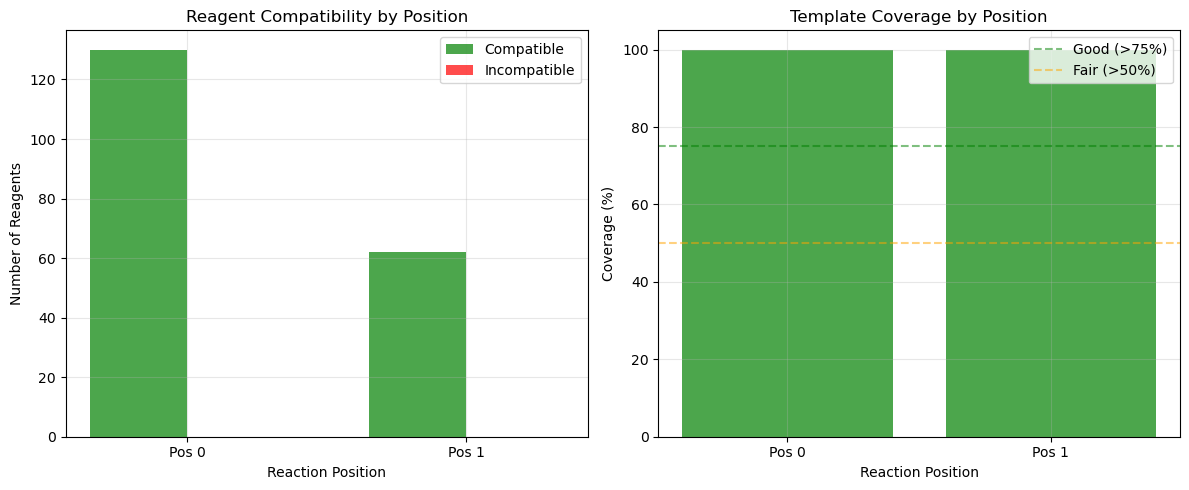


=== Summary Statistics ===
Position 0:
  Coverage: 100.0%
  Compatible: 130
  Incompatible: 0
Position 1:
  Coverage: 100.0%
  Compatible: 62
  Incompatible: 0


In [11]:
# Visualize
viz = SMARTSVisualizer(validator)
# viz.visualize_template_matches(0)
viz.generate_summary_plot()

In [12]:
# Find problems
analyzer = ReagentCompatibilityAnalyzer(validator)
report = analyzer.generate_compatibility_report()
print(report)

   Position  Total_Reagents  Compatible  Incompatible  Coverage_Percent  \
0         0             130         130             0             100.0   
1         1              62          62             0             100.0   

  Top_Failure_Reason  Failure_Count  
0                N/A              0  
1                N/A              0  
